# ML_SP22_Project_3 (CNN)

### Due Date: 5/16 23:59 pm

In [3]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.datasets import mnist

### The goal for this Project is to practice running CNN using a set of dog and cat image

### Loading the datasets

In [5]:
base_dir = "./dogsvscats"

In [4]:
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=32)

Found 2000 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=32)

Found 1000 files belonging to 2 classes.


In [6]:
test_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "test"),
        image_size=(180, 180),
        batch_size=1000)

Found 1000 files belonging to 2 classes.


### The above defines our in-sample and out-of-sample validation sets. We define the size of our picture images 180x180 pixels and also it is here where we define our batch sizes.

In [16]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
validation_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
test_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
images, labels = list(train_dataset.take(1))[0]
class_names = train_dataset.class_names

Text(0.5, 1.0, 'cat')

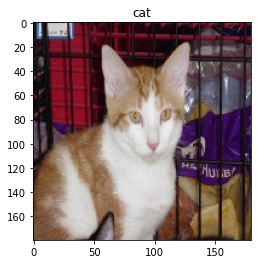

In [11]:
idx = 2
plt.imshow(images[idx].numpy().astype("uint8"))
plt.title(class_names[labels[idx].numpy()])

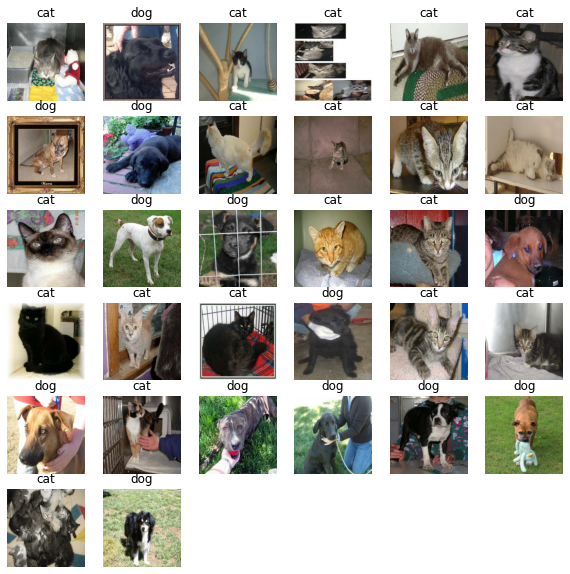

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

# Plotting the images
plt.show()

### Define your first CNN model

* Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

* Conv Layer: This layer will extract features from image.

* Pooling Layer: This layer reduce the spatial volume of input image after convolution.

* Fully Connected Layer: It connect the network from a layer to another layer.

* Output Layer: It is the predicted values layer.

In [14]:
# defining our convent 
inputs = keras.Input(shape=(180, 180, 3))

# for color images, may need to scale and normalize the inputs
x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
x = Dense(128,activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496 

### Comiple the model

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Running the first model

In [17]:
# increase epochs
history = model.fit(
    train_dataset,
    epochs=30, 
    validation_data=validation_dataset)

Epoch 1/30
63/63 [==============================] - 36s 562ms/step - loss: 1.0292 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5160
Epoch 2/30
63/63 [==============================] - 35s 561ms/step - loss: 0.6937 - accuracy: 0.5230 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 37s 581ms/step - loss: 0.6879 - accuracy: 0.5195 - val_loss: 0.6618 - val_accuracy: 0.5600
Epoch 4/30
63/63 [==============================] - 36s 575ms/step - loss: 0.6637 - accuracy: 0.5980 - val_loss: 0.6599 - val_accuracy: 0.5790
Epoch 5/30
63/63 [==============================] - 38s 598ms/step - loss: 0.6246 - accuracy: 0.6610 - val_loss: 0.6519 - val_accuracy: 0.6090
Epoch 6/30
63/63 [==============================] - 37s 583ms/step - loss: 0.5175 - accuracy: 0.7515 - val_loss: 0.6466 - val_accuracy: 0.6370
Epoch 7/30
63/63 [==============================] - 37s 582ms/step - loss: 0.3364 - accuracy: 0.8435 - val_loss: 0.8754 - val_accuracy: 0.6410

### Now, look at the testing dataset

In [18]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [19]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'cat')

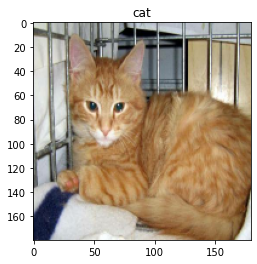

In [20]:
idx = 50
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [21]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [22]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [23]:
prediction = model.predict(img_batch)

In [24]:
print(prediction)

[[0.34269458]]


### Plotting Learning Curves

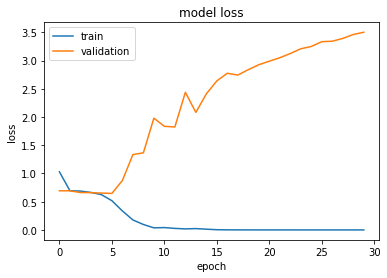

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

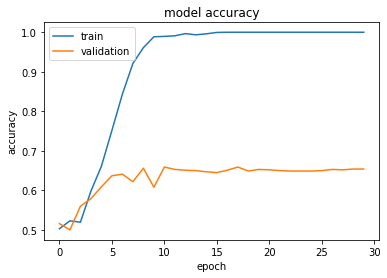

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### The validation error starts to increase after 10 epochs we can start to an error in both  the validation set.

### Evaluate your first model out-of-sample

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 96ms/step - loss: 3.7195 - accuracy: 0.6470
Test accuracy: 0.647


### Try different choices of epoch, batch size for your first model

In [110]:
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=22)

Found 2000 files belonging to 2 classes.


In [111]:
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=22)

Found 1000 files belonging to 2 classes.


In [49]:
history = model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset)

Epoch 1/10
112/112 [==============================] - 39s 346ms/step - loss: 5.6185e-06 - accuracy: 1.0000 - val_loss: 4.0323 - val_accuracy: 0.6450
Epoch 2/10
112/112 [==============================] - 39s 351ms/step - loss: 5.1247e-06 - accuracy: 1.0000 - val_loss: 4.0784 - val_accuracy: 0.6440
Epoch 3/10
112/112 [==============================] - 40s 355ms/step - loss: 0.2747 - accuracy: 0.9105 - val_loss: 1.3548 - val_accuracy: 0.6080
Epoch 4/10
112/112 [==============================] - 40s 355ms/step - loss: 0.2208 - accuracy: 0.9265 - val_loss: 1.5779 - val_accuracy: 0.6470
Epoch 5/10
112/112 [==============================] - 40s 359ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 2.0431 - val_accuracy: 0.6460
Epoch 6/10
112/112 [==============================] - 40s 357ms/step - loss: 0.0051 - accuracy: 0.9980 - val_loss: 2.3420 - val_accuracy: 0.6250
Epoch 7/10
112/112 [==============================] - 40s 360ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.6877 

### Now, look at the testing dataset again

In [37]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [38]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'dog')

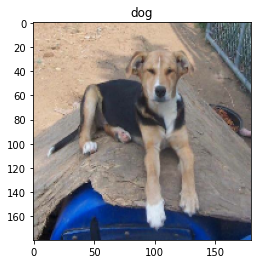

In [39]:
idx = 25
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [40]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [41]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [42]:
prediction = model.predict(img_batch)

In [43]:
print(prediction)

[[0.99276054]]


### Plotting Learning Curves

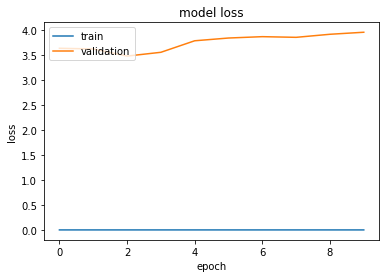

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

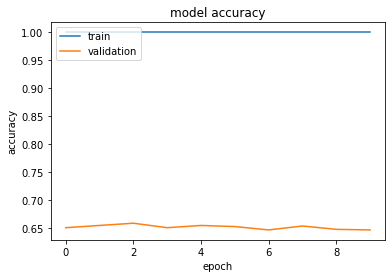

In [45]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate your first model out-of-sample

In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 102ms/step - loss: 4.2230 - accuracy: 0.6410
Test accuracy: 0.641


In [50]:
# define a small convent
inputs = Input(shape=(180, 180, 3))

x = inputs

# for color images, may need to scale and normalize the inputs
x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = Flatten()(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [51]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0   

### Comiple the model

In [53]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Running the first model

In [54]:
# increase epochs
history = model.fit(
    train_dataset,
    epochs=30, 
    validation_data=validation_dataset)

Epoch 1/30
112/112 [==============================] - 52s 454ms/step - loss: 5.7287 - accuracy: 0.5680 - val_loss: 1.0650 - val_accuracy: 0.5850
Epoch 2/30
112/112 [==============================] - 51s 455ms/step - loss: 2.5054 - accuracy: 0.7050 - val_loss: 19.3783 - val_accuracy: 0.5020
Epoch 3/30
112/112 [==============================] - 51s 453ms/step - loss: 1.7517 - accuracy: 0.7670 - val_loss: 11.0858 - val_accuracy: 0.5310
Epoch 4/30
112/112 [==============================] - 50s 450ms/step - loss: 1.2073 - accuracy: 0.8440 - val_loss: 6.3616 - val_accuracy: 0.6070
Epoch 5/30
112/112 [==============================] - 51s 452ms/step - loss: 0.8893 - accuracy: 0.8775 - val_loss: 8.8516 - val_accuracy: 0.6200
Epoch 6/30
112/112 [==============================] - 51s 452ms/step - loss: 0.7380 - accuracy: 0.9005 - val_loss: 5.1159 - val_accuracy: 0.6580
Epoch 7/30
112/112 [==============================] - 50s 444ms/step - loss: 0.6654 - accuracy: 0.9165 - val_loss: 6.1417 - val_

### Now, look at the testing dataset

In [55]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [56]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'dog')

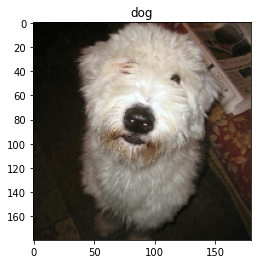

In [57]:
idx = 18
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [58]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [59]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [60]:
prediction = model.predict(img_batch)

In [61]:
# zero is a cat and the closer it is to a 1 is a dog, thus its closer to a zero here
print(prediction)

[[1.]]


### Plotting Learning Curves

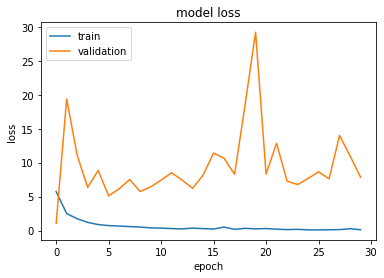

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

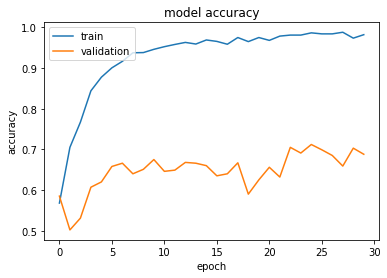

In [63]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### The validation error starts to increase after 10 epochs we can start to an error in both  the validation set.

### Evaluate your first model out-of-sample

In [64]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 124ms/step - loss: 8.7182 - accuracy: 0.6680
Test accuracy: 0.668


### Try a second model with slightly different architecture (no need to be very complicated)

In [70]:
# define a small convent
inputs = Input(shape=(180, 180, 3))

x = inputs

# for color images, may need to scale and normalize the inputs
x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = Conv2D(filters=180, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(500,activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [71]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_16 (Bat  (None, 180, 180, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_17 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0   

### Compile the model

In [72]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Running the different TOPOLOGY model

In [73]:
# increase epochs
history = model.fit(
    train_dataset,
    epochs=18, 
    validation_data=validation_dataset)

Epoch 1/18
112/112 [==============================] - 51s 445ms/step - loss: 0.9266 - accuracy: 0.5940 - val_loss: 1.2179 - val_accuracy: 0.5000
Epoch 2/18
112/112 [==============================] - 52s 465ms/step - loss: 0.7606 - accuracy: 0.6140 - val_loss: 0.8433 - val_accuracy: 0.5120
Epoch 3/18
112/112 [==============================] - 51s 452ms/step - loss: 0.6652 - accuracy: 0.6755 - val_loss: 1.5503 - val_accuracy: 0.5020
Epoch 4/18
112/112 [==============================] - 52s 460ms/step - loss: 0.5515 - accuracy: 0.7325 - val_loss: 1.5607 - val_accuracy: 0.5470
Epoch 5/18
112/112 [==============================] - 52s 467ms/step - loss: 0.5335 - accuracy: 0.7390 - val_loss: 0.8106 - val_accuracy: 0.6270
Epoch 6/18
112/112 [==============================] - 51s 460ms/step - loss: 0.5353 - accuracy: 0.7610 - val_loss: 0.6930 - val_accuracy: 0.6660
Epoch 7/18
112/112 [==============================] - 52s 460ms/step - loss: 0.4666 - accuracy: 0.7725 - val_loss: 0.7331 - val_ac

### Now, look at the testing dataset

In [74]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [75]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'cat')

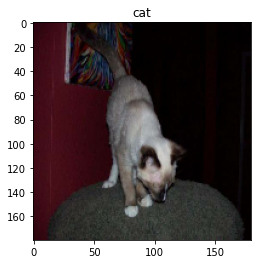

In [84]:
idx = 6
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [85]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [86]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [87]:
prediction = model.predict(img_batch)

In [88]:
# zero is a cat and the closer it is to a 1 is a dog, thus its closer to a zero here
print(prediction)

[[0.26472604]]


### Plotting Learning Curves

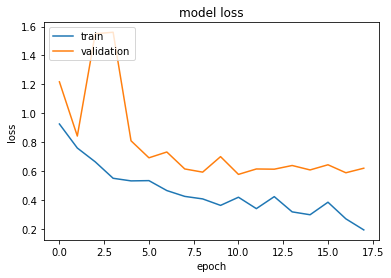

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

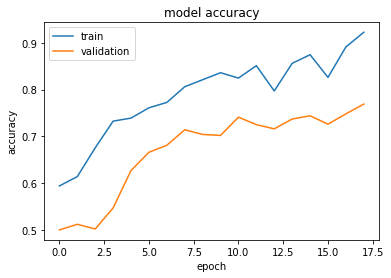

In [82]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### The validation error starts to increase after 10 epochs we can start to an error in both  the validation set.

### Evaluate your second model out-of-sample with our different architecture; let us use the sequential built in API for KERAS versus having to build our model ourselves

In [83]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 5s 167ms/step - loss: 0.6261 - accuracy: 0.7450
Test accuracy: 0.745


In [10]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['acc'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [127]:
# increase epochs
history_last = model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset)

Epoch 1/10
91/91 [==============================] - 41s 451ms/step - loss: 0.2943 - acc: 0.9035 - val_loss: 2.7036 - val_acc: 0.7190
Epoch 2/10
91/91 [==============================] - 43s 467ms/step - loss: 0.3234 - acc: 0.8950 - val_loss: 2.0994 - val_acc: 0.7100
Epoch 3/10
91/91 [==============================] - 41s 454ms/step - loss: 0.3117 - acc: 0.9030 - val_loss: 2.7955 - val_acc: 0.7220
Epoch 4/10
91/91 [==============================] - 41s 455ms/step - loss: 0.3544 - acc: 0.8905 - val_loss: 3.6604 - val_acc: 0.7050
Epoch 5/10
91/91 [==============================] - 41s 449ms/step - loss: 0.3112 - acc: 0.8865 - val_loss: 1.6395 - val_acc: 0.6990
Epoch 6/10
91/91 [==============================] - 41s 446ms/step - loss: 0.3190 - acc: 0.8950 - val_loss: 2.6204 - val_acc: 0.7260
Epoch 7/10
91/91 [==============================] - 41s 449ms/step - loss: 0.3493 - acc: 0.8870 - val_loss: 2.0849 - val_acc: 0.7130
Epoch 8/10
91/91 [==============================] - 41s 449ms/step - 

In [130]:
# increase epochs
history_last = model.fit(
    train_dataset,
    epochs=4, 
    validation_data=validation_dataset)

Epoch 1/4
91/91 [==============================] - 41s 451ms/step - loss: 0.2719 - acc: 0.8975 - val_loss: 2.6440 - val_acc: 0.7140
Epoch 2/4
91/91 [==============================] - 41s 452ms/step - loss: 0.4217 - acc: 0.8755 - val_loss: 2.1630 - val_acc: 0.6960
Epoch 3/4
91/91 [==============================] - 41s 451ms/step - loss: 0.3747 - acc: 0.8830 - val_loss: 0.9578 - val_acc: 0.6060
Epoch 4/4
91/91 [==============================] - 41s 449ms/step - loss: 0.3321 - acc: 0.8825 - val_loss: 1.1864 - val_acc: 0.6660


In [6]:
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=40)

Found 2000 files belonging to 2 classes.


In [7]:
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=40)

Found 1000 files belonging to 2 classes.


In [8]:
test_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "test"),
        image_size=(180, 180),
        batch_size=1000)

Found 1000 files belonging to 2 classes.


# Lets Try 100 Epochs

In [13]:
# increase epochs
history_last = model.fit(
    train_dataset,
    epochs=60, 
    validation_data=validation_dataset)

Epoch 1/60
50/50 [==============================] - 33s 642ms/step - loss: 45.7328 - acc: 0.5205 - val_loss: 0.7606 - val_acc: 0.5000
Epoch 2/60
50/50 [==============================] - 32s 638ms/step - loss: 0.7589 - acc: 0.5200 - val_loss: 0.6788 - val_acc: 0.5310
Epoch 3/60
50/50 [==============================] - 33s 658ms/step - loss: 1.3528 - acc: 0.5390 - val_loss: 0.6754 - val_acc: 0.5690
Epoch 4/60
50/50 [==============================] - 32s 644ms/step - loss: 0.7098 - acc: 0.5705 - val_loss: 0.6585 - val_acc: 0.6020
Epoch 5/60
50/50 [==============================] - 32s 635ms/step - loss: 0.7043 - acc: 0.5825 - val_loss: 0.6792 - val_acc: 0.5980
Epoch 6/60
50/50 [==============================] - 32s 645ms/step - loss: 0.7152 - acc: 0.6185 - val_loss: 2.1698 - val_acc: 0.5040
Epoch 7/60
50/50 [==============================] - 33s 669ms/step - loss: 0.6775 - acc: 0.6645 - val_loss: 0.7095 - val_acc: 0.6140
Epoch 8/60
50/50 [==============================] - 32s 647ms/step -

### Now, look at the testing dataset

In [14]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [20]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'cat')

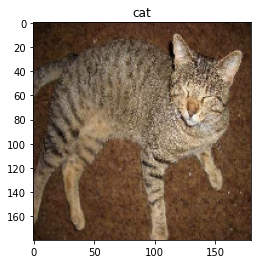

In [28]:
idx = 44
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [29]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [30]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [31]:
prediction = model.predict(img_batch)

In [32]:
# zero is a cat and the closer it is to a 1 is a dog, thus its closer to a zero here
print(prediction)

[[0.0043053]]


### Plotting Learning Curves

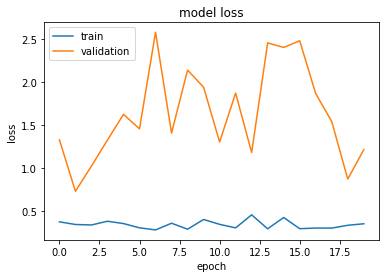

In [124]:
plt.plot(history_last.history['loss'])
plt.plot(history_last.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

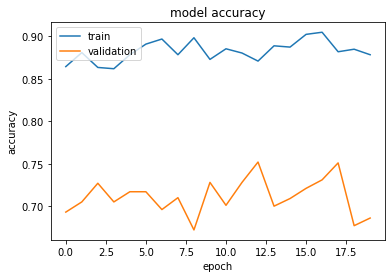

In [125]:
# summarize history for accuracy
plt.plot(history_last.history['acc'])
plt.plot(history_last.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### The validation error starts to increase after 10 epochs we can start to an error in both  the validation set.

### Evaluate your second model out-of-sample with our different architecture

In [126]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 118ms/step - loss: 1.2864 - acc: 0.6830
Test accuracy: 0.683


In [129]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 116ms/step - loss: 2.6433 - acc: 0.7080
Test accuracy: 0.708


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 95ms/step - loss: 2.1707 - acc: 0.6930
Test accuracy: 0.693


### Summarize your findings below